# inference only

### Подготовка, данные и модели

In [1]:
!git clone https://github.com/tayfen/key_seg_project.git

Cloning into 'key_seg_project'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 3), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [2]:
# скачать данные для сегментации
%cd /content/key_seg_project/
!pip uninstall gdown -y && pip install gdown
dataset_link = 'https://drive.google.com/uc?id=1iOTwWT8jqoAR2HVla4KdXl2ML7KzpB9a'
!mkdir dataset
!gdown {dataset_link} -O /content/key_seg_project/dataset/dataset.tar
%cd /content/key_seg_project/dataset/
!tar -xvf dataset.tar

%cd /content/key_seg_project/
detection_dataset_link = 'https://drive.google.com/uc?id=1RbyDIDUrj6H2MlsjlrRxRoO3zXXovAaC'

!mkdir detection_dataset
!gdown {detection_dataset_link} -O /content/key_seg_project/detection_dataset/dataset.zip
%cd /content/key_seg_project/detection_dataset/
!unzip dataset.zip

/content/key_seg_project
Found existing installation: gdown 4.4.0
Uninstalling gdown-4.4.0:
  Successfully uninstalled gdown-4.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=5ce7b64fc0bd64b35e888b1989d0e58d999f1576553dbf71671b6aaa14a5c04c
  Stored in directory: /root/.cache/pip/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
Downloading...
From: https://drive.google.com/uc?id=1iOTwWT8jqoAR2HVla4KdXl2ML7KzpB9a
To: /content/key_seg_project/dataset/dataset.tar
100% 52.1M/52.1M [00:00<00:00, 61.8MB/s]
/content/key_seg_project/dataset
tar: Removing leading `/' from member names
/
ds0/
ds0/ann/
ds0/ann/resized_cropped_cropped_6138bc4c-ae6c-4c5d-a268-d671384dd92a_002_f63f0a9e0d.jpg.json
ds

In [3]:
# скачать модельки
%cd /content/key_seg_project/
detection_link = 'https://drive.google.com/uc?id=1CX2IoligodyQrKZMYiOKY8Lu8TzZLxYT'
segmentation_link = 'https://drive.google.com/uc?id=13PvtiTy_uQ4xl72ZVT8nF4qqa6mm-7xr'
!mkdir models
!gdown {detection_link} -O /content/key_seg_project/models/detection.pth
!gdown {segmentation_link} -O /content/key_seg_project/models/segmentation.pth


/content/key_seg_project
Downloading...
From: https://drive.google.com/uc?id=1CX2IoligodyQrKZMYiOKY8Lu8TzZLxYT
To: /content/key_seg_project/models/detection.pth
100% 195M/195M [00:03<00:00, 58.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=13PvtiTy_uQ4xl72ZVT8nF4qqa6mm-7xr
To: /content/key_seg_project/models/segmentation.pth
100% 126M/126M [00:01<00:00, 73.6MB/s]


## Подготовка и тесты

### Detection

In [4]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

%cd ..

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.3 MB/s eta 0:16:11tcmalloc: large alloc 1147494400 bytes == 0x3a3b2000 @  0x7f9f73529615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████▉                | 1055.7 MB 1.3 MB/s eta 0:13:46tcmalloc: large alloc 1434370048 bytes == 0x7ea08000 @  0x7f9f73529615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████

In [5]:
from os import environ
import sys
environ['MMDETECTION_DIR'] = '/content/key_seg_project/mmdetection'
environ['MODEL_PATH'] = '/content/key_seg_project/models/detection.pth'
sys.path.append(environ['MMDETECTION_DIR'])

from proc_detection import key_detection

detectron = key_detection()

load checkpoint from local path: /content/key_seg_project/models/detection.pth


In [6]:
from glob import glob
test_photos_dir = '/content/key_seg_project/detection_dataset/object_detection_coco/test/images'
all_photos = glob(test_photos_dir + '/*', recursive = True)

/content/key_seg_project/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[array([[188.53372   , 182.62103   , 330.48328   , 482.716     ,
          0.99999785]], dtype=float32)]
[array([[188.53372   , 182.62103   , 330.48328   , 482.716     ,
          0.99999785]], dtype=float32)]


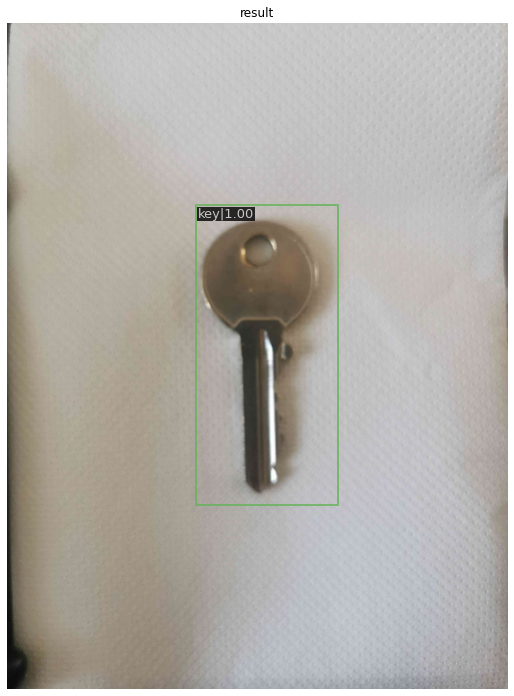

In [7]:
import mmcv
import random
from mmdet.apis import show_result_pyplot, inference_detector
# для обработки можно скалировать и еще меньше, просто чтобы быстрее было
img = detectron.scale_img(mmcv.imread(random.choice(all_photos)), 500)
cropped_img = detectron.proc_img(img) # вот эти обрезанные изображения и использовались для построения датасета для сегментации
show_result_pyplot(detectron.model, img, detectron.scaled_result)

### Segmentation

In [9]:
from proc_segmentation import UNet
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet()
model.load_state_dict(torch.load('/content/key_seg_project/models/segmentation.pth'))
unet_model = model.to(device)

In [10]:
core_path = '/content/key_seg_project/dataset/ds0/'

import glob
img = sorted(glob.glob(f"{core_path}img/*"))
mask = sorted(glob.glob(f"{core_path}masks_machine/*.png"))
ann = sorted(glob.glob(f"{core_path}ann/*.json"))

In [11]:
#фильтруем файлы основываясь на аннотациях
from PIL import Image
import numpy as np

dataset = {'good' : {'mask' :[], 'img': []}, 'mid' : {'mask' :[], 'img': []}}

import json 
for ind, f_ann in enumerate(ann):
    data = json.load(open(f_ann))
    if data['tags']:
        if data['tags'][0]['name'] == 'bad image':
            continue
        if data['tags'][0]['name'] == 'mid_quality image':
            dataset['mid']['mask'].append(mask[ind])
            dataset['mid']['img'].append(img[ind])
            continue
    else:
        if data['objects'][0]['tags']:
            if data['objects'][0]['tags'][0]['name'] == 'bad image':
                continue
            if data['objects'][0]['tags'][0]['name'] == 'mid_quality image':
                dataset['mid']['mask'].append(mask[ind])
                dataset['mid']['img'].append(img[ind])
                continue
        
    dataset['good']['mask'].append(mask[ind])
    dataset['good']['img'].append(img[ind])


In [12]:
from torch.utils.data import DataLoader
from proc_segmentation import FilteredKeySegDataset
batch_size = 4
photos, labels = dataset['good']['img'], dataset['good']['mask']
dataset = FilteredKeySegDataset(photos, labels)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

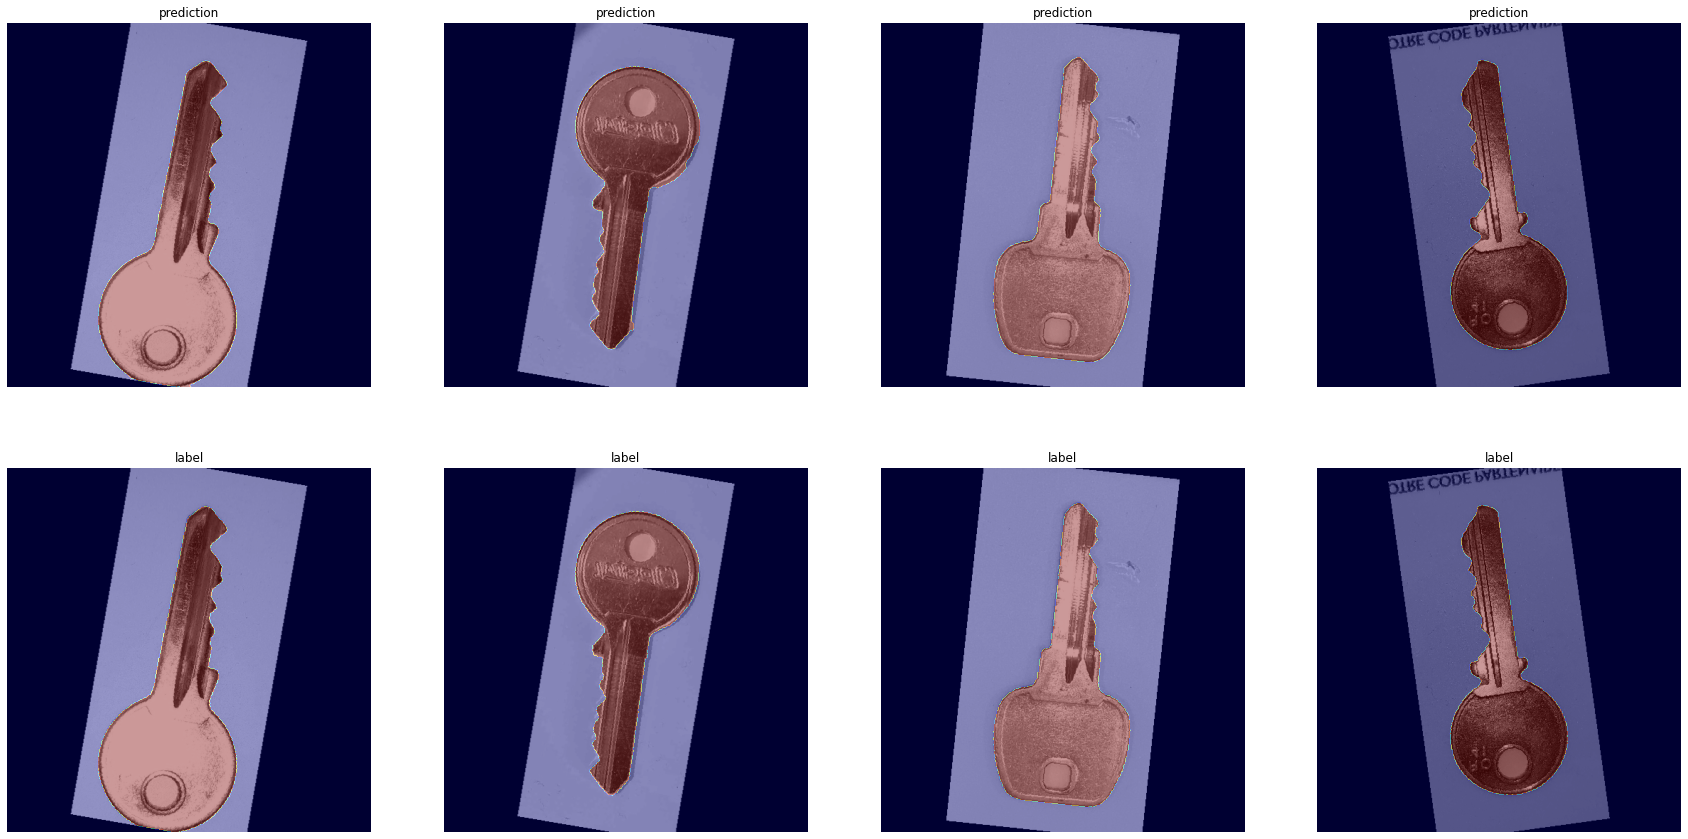

In [14]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

unet_model.eval()

X_batch, Y_batch  = iter(loader).next()
X_batch = X_batch.to(device)
Y_batch = Y_batch.to(device)
Y_pred = unet_model(X_batch)

Y_hat = Y_pred.detach().cpu()
X_hat = X_batch.detach().cpu().numpy()

Y_hat_l = Y_batch.detach().cpu().numpy()


plt.figure(figsize=(30,15))

for k in range(4):
    plt.subplot(2, 4, k+1)
    #plt.imshow(np.moveaxis(X_hat[k], 0, 2), cmap='gray')
    plt.imshow(X_hat[k, 0], cmap='gray')
    plt.title('prediction')
    plt.axis('off')

    Y_hat[k, 0][Y_hat[k, 0]<0.5]=0
    Y_hat[k, 0][Y_hat[k, 0]>0.5]=1

    # добавить прозрачную маску на ту же картинку
    plt.imshow(Y_hat[k, 0], cmap='jet', alpha=0.4) # interpolation='none'

    plt.subplot(2, 4, k+5)
    plt.imshow(X_hat[k, 0], cmap='gray')
    plt.imshow(Y_hat_l[k, 0], cmap='jet', alpha=0.4)
    plt.title('label')
    plt.axis('off')


## Gradio test

In [15]:
!pip install gradio -q

     |████████████████████████████████| 5.6 MB 9.2 MB/s 
     |████████████████████████████████| 140 kB 75.3 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 57 kB 6.0 MB/s 
     |████████████████████████████████| 272 kB 67.2 MB/s 
     |████████████████████████████████| 1.1 MB 54.8 MB/s 
     |████████████████████████████████| 2.3 MB 49.5 MB/s 
     |████████████████████████████████| 212 kB 62.4 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 50.0 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 144 kB 66.1 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 10.6 MB/s 
     |████████████████████████████████| 68 kB 8.0 MB/s 
     |██████████████████████████

In [121]:
import gradio

import cv2
from torchvision.utils import save_image
import torchvision.transforms as tt
import torchvision.transforms.functional as TF
import PIL

RESCALE_SIZE = 512

class SquarePad:
	def __call__(self, image):
		w, h = image.size
		max_wh = np.max([w, h])
		hp = int((max_wh - w) / 2)
		vp = int((max_wh - h) / 2)
		padding = (hp, vp, hp, vp)
		return TF.pad(image, padding, 0, 'constant')

def segment(image):
    needed_transform = tt.Compose([
            SquarePad(),
            tt.ToTensor(),            
            tt.Resize([RESCALE_SIZE, RESCALE_SIZE]),                    
        ])
    
    image = needed_transform(image)
    image = image.to(device)
    image = torch.unsqueeze(image, dim=0)
    res = unet_model(image).squeeze()
    res = res.detach().cpu()
    image = image.detach().squeeze().cpu().numpy()
    image = np.moveaxis(image, 0, 2)
    res[res<0.5]=0
    res[res>0.5]=1

    alpha = 1 
    beta = 0.7 # transparency for the segmentation map
    gamma = 0 # scalar added to each sum
    colored_mask = np.zeros_like(image).astype(np.uint8)
    color = [50, 170,  170]
    colored_mask[res == 1] = color
    image = np.array(255*image).astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    to_show = cv2.addWeighted(image, alpha, colored_mask, beta, gamma, image)

    return to_show

io = gradio.Interface(inputs=gradio.Image(type = 'pil'), 
                      outputs="image",
                      fn=segment)

In [122]:
io.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://51582.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f2911ca7410>,
 'http://127.0.0.1:7861/',
 'https://51582.gradio.app')